<a href="https://colab.research.google.com/github/Tdavies92/AcademyPublic/blob/main/FPL%20(custom).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests
import json
import csv 
import os
import pandas as pd

def get_data():
    """ Retrieve the fpl player data from the hard-coded url
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    responseStr = response.text
    data = json.loads(responseStr)
    return data

with open('raw.json', 'w') as outf:
      json.dump(get_data(), outf)

def extract_stat_names(dict_of_stats):
    """ Extracts all the names of the statistics
    Args:
        dict_of_stats (dict): Dictionary containing key-alue pair of stats
    """
    stat_names = []
    for key, val in dict_of_stats.items():
        stat_names += [key]
    return stat_names

def parse_players(list_of_players, base_filename):
    stat_names = extract_stat_names(list_of_players[0])
    filename = base_filename + 'players_raw.csv'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    f = open(filename, 'w+', encoding='utf8', newline='')
    w = csv.DictWriter(f, sorted(stat_names))
    w.writeheader()
    for player in list_of_players:
            w.writerow({k:str(v).encode('utf-8').decode('utf-8') for k, v in player.items()})

def get_fixtures_data():
    """ Retrieve the fixtures data for the season
    """
    url = "https://fantasy.premierleague.com/api/fixtures/"
    response = ''
    while response == '':
        try:
            response = requests.get(url)
        except:
            time.sleep(5)
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    data = json.loads(response.text)
    return data

def parse_fixtures(data, outfile_base):
    fixtures_df = pd.DataFrame.from_records(data)
    fixtures_df.to_csv(os.path.join(outfile_base, 'fixtures.csv'), index=False)

def fixtures(base_filename):
    data = get_fixtures_data()
    parse_fixtures(data, base_filename)

def parse_team_data(data, outfile_base):
    teams_df = pd.DataFrame.from_records(data)
    teams_df.to_csv(os.path.join(outfile_base, 'teams.csv'), index=False)

#def get_teams(directory):
#    teams = {}
#    fin = open(directory + "/teams.csv", 'rU')
#    reader = csv.DictReader(fin)
#    for row in reader:
#        teams[int(row['id'])] = row['name']
#    return teams

def parse_data():
    """ Parse and store all the data
    """
    season = '2021-22'
    base_filename = 'data/' + season + '/'
    print("Getting data")
    data = get_data()
    print("Parsing summary data")
    parse_players(data["elements"], base_filename)
    print("Getting fixtures data")
    fixtures(base_filename)
    print("Getting teams data")    
    parse_team_data(data["elements"], base_filename)

def main():
    parse_data()

if __name__ == "__main__":
    main()


Getting data
Parsing summary data
Getting fixtures data
Getting teams data


In [16]:
df = pd.read_csv('/content/data/2021-22/players_raw.csv')

df = df[df.minutes > 0]

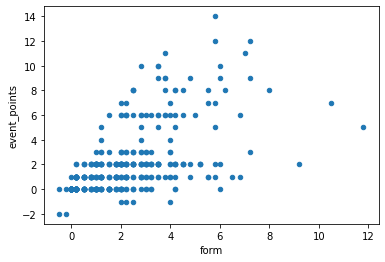

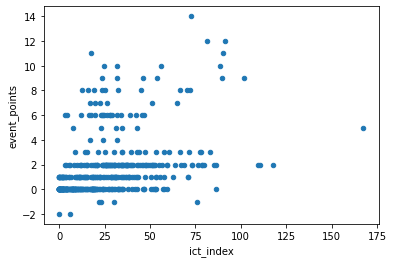

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data/2021-22/players_raw.csv')

df = df[df.minutes > 0]

# Let's see the features distributions in order to see if we have strange / extrem values
continuous_feature_analyze_distribution = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']

df.plot.scatter(x='form', y='event_points')
df.plot.scatter(x='ict_index', y='event_points')
